In [1]:
from IPython.display import display, HTML

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

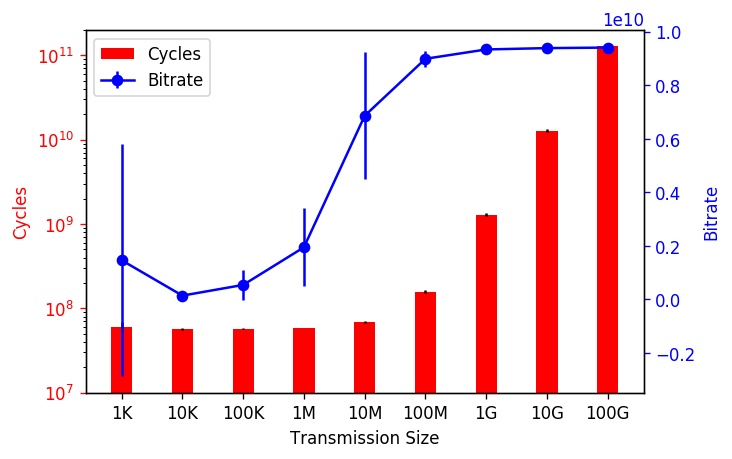

In [2]:
FILE_PATH = 'playbooks/remote_read/output/result.csv'
HEADER_COL = [0 ,1]

with open(FILE_PATH, 'r') as f:
    num_rows = f.readline().count(',')
df = pd.read_csv(FILE_PATH, index_col=HEADER_COL, header=None, names=range(1, num_rows)).T


# Add the avrerage row and the standard deviation row 
ROW_NAME_AVG = 'AVG'
ROW_NAME_STD = 'STD'
df = df.rename({num_rows - 1: ROW_NAME_AVG})
df.loc[ROW_NAME_STD] = np.nan

num_data_raws = num_rows - len(HEADER_COL)
for category in df.columns:
    df[category][ROW_NAME_AVG] = np.mean(df[category][:num_data_raws])
    df[category][ROW_NAME_STD] = np.std(df[category][:num_data_raws], ddof=1)

display(HTML(df.to_html()))


# Start to draw the chart

N = len(df.columns) / 2
ind = np.arange(N)  # the x locations for the groups

# Draw bins for Cycles
fig, ax1 = plt.subplots()
clr = 'r'
cycle_bar = ax1.bar(ind, df.loc[ROW_NAME_AVG][0::2], width=0.35, color=clr, yerr=df.loc[ROW_NAME_STD][0::2])
ax1.set_yscale('log')
ax1.set_ylim(ymin=1e7)
ax1.set_ylabel(df.columns[0][1], color=clr)
ax1.tick_params('y', colors=clr)


# Draw lines for Bitrate
ax2 = ax1.twinx()
clr = 'b'
bitrate_bar = ax2.errorbar(ind, df.loc[ROW_NAME_AVG][1::2], color=clr, yerr=df.loc[ROW_NAME_STD][1::2], fmt='-o')
# ax2.set_ylim(ymin=1e7)
ax2.set_ylabel(df.columns[1][1], color=clr)
ax2.tick_params('y', colors=clr)

# Change the size of figure
# See https://stackoverflow.com/a/4306340
fig.set_dpi(120)

ax1.set_xlabel('Transmission Size')
labels = [h[0] for h in df.columns][0::2]
plt.xticks(ind, labels)
plt.legend([cycle_bar, bitrate_bar], df[df.columns[0][0]].columns)

plt.show()